In [1]:
from pycorenlp import StanfordCoreNLP
from nltk.tree import *
import networkx as nx
from pprint import pprint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [17]:
nlp = StanfordCoreNLP('http://corenlp.run')

In [18]:
text = (
  'Pusheen and Smitha walked along the beach. '
  'Pusheen wanted to surf, but fell off the surfboard.')
output = nlp.annotate(text, properties={
  'annotators': 'tokenize,ssplit,pos,depparse,parse',
  'outputFormat': 'json'
  })

In [19]:
print(output['sentences'][1].keys())

dict_keys(['enhancedDependencies', 'basicDependencies', 'enhancedPlusPlusDependencies', 'index', 'tokens', 'parse'])


In [10]:
print ([s['parse'] for s in output['sentences']])

['(ROOT\n  (S\n    (NP (NNP Pusheen)\n      (CC and)\n      (NNP Smitha))\n    (VP (VBD walked)\n      (PP (IN along)\n        (NP (DT the) (NN beach))))\n    (. .)))', '(ROOT\n  (S\n    (NP (NNP Pusheen))\n    (VP\n      (VP (VBD wanted)\n        (PP (TO to)\n          (NP (NN surf))))\n      (, ,)\n      (CC but)\n      (VP (VBD fell)\n        (PRT (RP off))\n        (NP (DT the) (NN surfboard))))\n    (. .)))']


In [25]:
a = [s['parse'] for s in output['sentences']]

Tree.fromstring(a[1]).pretty_print()

                                ROOT                               
                                 |                                  
                                 S                                 
    _____________________________|_______________________________   
   |                             VP                              | 
   |             ________________|_________                      |  
   |            VP           |   |         |                     | 
   |       _____|___         |   |         |                     |  
   |      |         PP       |   |         VP                    | 
   |      |      ___|___     |   |     ____|_______              |  
   NP     |     |       NP   |   |    |   PRT      NP            | 
   |      |     |       |    |   |    |    |    ___|______       |  
  NNP    VBD    TO      NN   ,   CC  VBD   RP  DT         NN     . 
   |      |     |       |    |   |    |    |   |          |      |  
Pusheen wanted  to     surf  ,  but  fell

In [24]:
a[1].nx_graph()

AttributeError: 'str' object has no attribute 'nx_graph'

-----

In [41]:
import networkx as nx
from pycorenlp import StanfordCoreNLP
from pprint import pprint

nlp = StanfordCoreNLP('http://localhost:{0}'.format(9000))
def get_stanford_annotations(text, port=9000,
                             annotators='tokenize,ssplit,pos,lemma,depparse,parse'):
    output = nlp.annotate(text, properties={
        "timeout": "10000",
        "ssplit.newlineIsSentenceBreak": "two",
        'annotators': annotators,
        'outputFormat': 'json'
    })
    return output

# The code expects the document to contains exactly one sentence.
document =  'Robots in popular culture are there to remind us of the awesomeness of'\
            'unbound human agency.'
print('document: {0}'.format(document))

# Parse the text
annotations = get_stanford_annotations(document, port=9000,
                                       annotators='tokenize,ssplit,pos,lemma,depparse')
tokens = annotations['sentences'][0]['tokens']

# Load Stanford CoreNLP's dependency tree into a networkx graph
edges = []
dependencies = {}
for edge in annotations['sentences'][0]['basicDependencies']:
    edges.append((edge['governor'], edge['dependent']))
    dependencies[(min(edge['governor'], edge['dependent']),
                  max(edge['governor'], edge['dependent']))] = edge

graph = nx.Graph(edges)
#pprint(dependencies)
#print('edges: {0}'.format(edges))

# Find the shortest path
token1 = 'Robots'
token2 = 'awesomeness'
for token in tokens:
    if token1 == token['originalText']:
        token1_index = token['index']
    if token2 == token['originalText']:
        token2_index = token['index']

path = nx.shortest_path(graph, source=token1_index, target=token2_index)
print('path: {0}'.format(path))

for token_id in path:
    token = tokens[token_id-1]
    token_text = token['originalText']
    print('Node {0}\ttoken_text: {1}'.format(token_id,token_text))

document: Robots in popular culture are there to remind us of the awesomeness ofunbound human agency.
path: [1, 5, 8, 15, 12]
Node 1	token_text: Robots
Node 5	token_text: are
Node 8	token_text: remind
Node 15	token_text: agency
Node 12	token_text: awesomeness


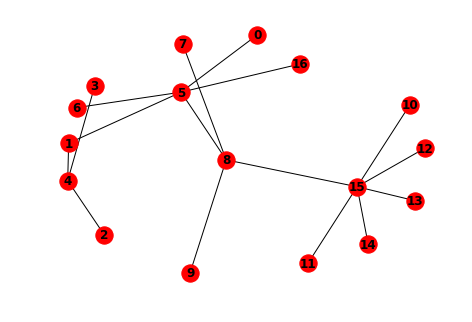

In [46]:
nx.draw(graph, with_labels=True, font_weight='bold')

In [17]:
import numpy as np

In [19]:
a = 10*np.random.random((2,12))

In [20]:
a

array([[ 4.09345093,  5.31773578,  8.91479653,  9.78849956,  0.36601476,
         3.56574512,  2.43414774,  3.45917946,  2.7753071 ,  3.91619923,
         3.85888935,  0.97751023],
       [ 4.18066637,  9.15899587,  0.62613499,  0.19839571,  1.95362138,
         7.4238045 ,  5.23839974,  9.18112598,  5.61895301,  8.63719764,
         7.46317859,  8.18581748]])

In [21]:
np.floor(a)

array([[ 4.,  5.,  8.,  9.,  0.,  3.,  2.,  3.,  2.,  3.,  3.,  0.],
       [ 4.,  9.,  0.,  0.,  1.,  7.,  5.,  9.,  5.,  8.,  7.,  8.]])

In [29]:
from nltk import *

In [30]:
parser = CoreNLPParser(url='http://localhost:9000')

In [31]:
next(
    parser.raw_parse('The quick brown fox jumps over the lazy dog.')
).pretty_print() 

                     ROOT                          
                      |                             
                      S                            
       _______________|__________________________   
      |                         VP               | 
      |                _________|___             |  
      |               |             PP           | 
      |               |     ________|___         |  
      NP              |    |            NP       | 
  ____|__________     |    |     _______|____    |  
 DT   JJ    JJ   NN  VBZ   IN   DT      JJ   NN  . 
 |    |     |    |    |    |    |       |    |   |  
The quick brown fox jumps over the     lazy dog  . 



In [34]:
parser.raw_parse('The quick brown fox jumps over the lazy dog.')

----

In [5]:
# For corefference relation
text = (
  'John and Jennifer are close. '
  'He loves cse but she plays games.'
)
output = nlp.annotate(text, properties={
  'annotators': 'tokenize,ssplit,pos,depparse,parse,coref',
  'outputFormat': 'json'
  })

In [6]:
print(output['sentences'][1].keys())

dict_keys(['enhancedDependencies', 'basicDependencies', 'enhancedPlusPlusDependencies', 'index', 'tokens', 'parse'])


In [7]:
print(output['sentences'][1].keys())

dict_keys(['enhancedDependencies', 'basicDependencies', 'enhancedPlusPlusDependencies', 'index', 'tokens', 'parse'])


In [8]:
print(output['sentences'][0]['basicDependencies'])

[{'governor': 0, 'governorGloss': 'ROOT', 'dependentGloss': 'close', 'dep': 'ROOT', 'dependent': 5}, {'governor': 5, 'governorGloss': 'close', 'dependentGloss': 'John', 'dep': 'nsubj', 'dependent': 1}, {'governor': 1, 'governorGloss': 'John', 'dependentGloss': 'and', 'dep': 'cc', 'dependent': 2}, {'governor': 1, 'governorGloss': 'John', 'dependentGloss': 'Jennifer', 'dep': 'conj', 'dependent': 3}, {'governor': 5, 'governorGloss': 'close', 'dependentGloss': 'are', 'dep': 'cop', 'dependent': 4}, {'governor': 5, 'governorGloss': 'close', 'dependentGloss': '.', 'dep': 'punct', 'dependent': 6}]


In [9]:
output.keys()

dict_keys(['corefs', 'sentences'])

In [10]:
pprint(output['corefs'])

{'3': [{'animacy': 'ANIMATE',
        'endIndex': 4,
        'gender': 'FEMALE',
        'headIndex': 3,
        'id': 1,
        'isRepresentativeMention': True,
        'number': 'SINGULAR',
        'position': [1, 2],
        'sentNum': 1,
        'startIndex': 3,
        'text': 'Jennifer',
        'type': 'PROPER'},
       {'animacy': 'ANIMATE',
        'endIndex': 6,
        'gender': 'FEMALE',
        'headIndex': 5,
        'id': 3,
        'isRepresentativeMention': False,
        'number': 'SINGULAR',
        'position': [2, 2],
        'sentNum': 2,
        'startIndex': 5,
        'text': 'she',
        'type': 'PRONOMINAL'}],
 '5': [{'animacy': 'ANIMATE',
        'endIndex': 2,
        'gender': 'MALE',
        'headIndex': 1,
        'id': 0,
        'isRepresentativeMention': True,
        'number': 'SINGULAR',
        'position': [1, 1],
        'sentNum': 1,
        'startIndex': 1,
        'text': 'John',
        'type': 'PROPER'},
       {'animacy': 'ANIMATE',
      

In [11]:
print(output['sentences'][0]['parse'])
print(output['sentences'][1]['parse'])

(ROOT
  (S
    (NP (NNP John)
      (CC and)
      (NNP Jennifer))
    (VP (VBP are)
      (ADJP (JJ close)))
    (. .)))
(ROOT
  (S
    (S
      (NP (PRP He))
      (VP (VBZ loves)
        (NP (NN cse))))
    (CC but)
    (S
      (NP (PRP she))
      (VP (VBZ plays)
        (NP (NNS games))))
    (. .)))
